### Normal setting

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time
import pickle
import random

from itertools import permutations
from functions import *

SEED = 123
random.seed(SEED)
np.random.seed(SEED)

In [2]:
nc=4
nr=3

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=100, size=nc*nr).reshape(nr,nc)
X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

array([[10,  9,  3,  0],
       [ 3, 10, 10,  7],
       [ 0,  1,  1, 10]])

In [3]:
unique_routes = get_unique_routes(X)
unique_routes

array([[-1, -1,  1,  1,  1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1,  1, -1, -1]])

In [4]:
unique_paths = get_path_from_routes(X, unique_routes)
unique_paths

[{'path_id': 0, 'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 1, 'path': [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 2, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 3, 'path': [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 4, 'path': [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3)]},
 {'path_id': 5, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 6, 'path': [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 7, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3)]},
 {'path_id': 8, 'path': [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3)]},
 {'path_id': 9, 'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3)]}]

In [5]:
for path_info in unique_paths:
    print(path_info['path_id'],get_weight_from_path(X,path_info['path']))

0 25
1 35
2 44
3 50
4 41
5 50
6 56
7 43
8 49
9 39


In [6]:
unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)

#best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
best_route = unique_paths[np.argmax(boot_sample_out[:,1])]

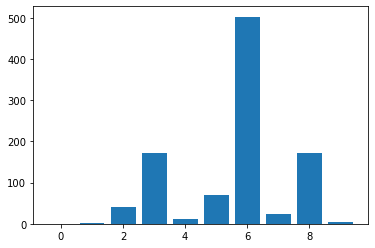

In [7]:
plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.show()

In [8]:
boot_sample_out_all = []
for i in range(len(unique_routes)):
    boot_sample_out_all.append(np.array([i, boot_sample_out[boot_sample_out[:,0]==i][0][1]]))
        
boot_sample_out_all = np.vstack(boot_sample_out_all)

out_name = 'grid_example_normal'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_out_all, f)

In [9]:
boot_sample_out_all

array([[  0,   0],
       [  1,   2],
       [  2,  41],
       [  3, 173],
       [  4,  12],
       [  5,  69],
       [  6, 503],
       [  7,  23],
       [  8, 172],
       [  9,   5]])